### Data Preparation and Processing

- In data processing we have to convert the data into the format which **fit function** accepts. Which can be known using API docs for fit function. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit




In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []


Example data:  
    - An experimental drug was tested on the individuals from ages 13 to 100 in a clinical trial.  
    - The trial had 2100 participants. Half were 65 years old, half were 65 years or older.   
    - 95% of 65 years or older experienced side effects.  
    - 95% of patients under 65 years experienced no side effects.  

# Dataset generation



In [4]:
for i in range(50):
    # 5% of patients under 65 experienced side effects.
    random_age = randint(13, 65)
    train_samples.append(random_age)
    train_labels.append(1)
    
    # 5% of patients above 65 experienced no side effects.
    random_age = randint(65, 100)
    train_samples.append(random_age)
    train_labels.append(0)
    
for i in range(1000):
    # 95% of patients under 65 experienced no side effects.
    random_age = randint(13, 65)
    train_samples.append(random_age)
    train_labels.append(0)
    
    # 95% of patients above 65 experienced side effects.
    random_age = randint(65,100)
    train_samples.append(random_age)
    train_labels.append(1)

In [5]:
# Convert the list into np array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# shuffle train_labels and train_samples
(train_labels, train_samples) = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_train_samples

array([[0.27586207],
       [0.95402299],
       [0.12643678],
       ...,
       [0.13793103],
       [0.93103448],
       [0.72413793]])

## tf.keras Sequential Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # here units are arbitrary, 
    #since 1d arr input shape is (1,) nd activation fn is rectified linear units
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax') # softmax converts vector of no to vector of probabilities
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1,batch_size=10, epochs=30, shuffle=True, verbose=2)

# epochs = The model is going to train 30 times on all the data
# batch_size = 10 samples will be sent and processed at a time by model
# validation split = x, 0<x<1
# it is goint to take the last 10% of the data before shuffle. The shuffle occurs after split.

Epoch 1/30
189/189 - 1s - loss: 0.2545 - accuracy: 0.9323 - val_loss: 0.2386 - val_accuracy: 0.9381
Epoch 2/30
189/189 - 0s - loss: 0.2541 - accuracy: 0.9354 - val_loss: 0.2385 - val_accuracy: 0.9381
Epoch 3/30
189/189 - 0s - loss: 0.2537 - accuracy: 0.9349 - val_loss: 0.2386 - val_accuracy: 0.9381
Epoch 4/30
189/189 - 0s - loss: 0.2533 - accuracy: 0.9381 - val_loss: 0.2383 - val_accuracy: 0.9381
Epoch 5/30
189/189 - 0s - loss: 0.2530 - accuracy: 0.9323 - val_loss: 0.2378 - val_accuracy: 0.9381
Epoch 6/30
189/189 - 0s - loss: 0.2524 - accuracy: 0.9344 - val_loss: 0.2373 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 0s - loss: 0.2523 - accuracy: 0.9392 - val_loss: 0.2375 - val_accuracy: 0.9381
Epoch 8/30
189/189 - 0s - loss: 0.2518 - accuracy: 0.9370 - val_loss: 0.2372 - val_accuracy: 0.9381
Epoch 9/30
189/189 - 0s - loss: 0.2514 - accuracy: 0.9376 - val_loss: 0.2373 - val_accuracy: 0.9381
Epoch 10/30
189/189 - 0s - loss: 0.2511 - accuracy: 0.9402 - val_loss: 0.2367 - val_accuracy: 0.9476

In [12]:
test_samples = []
test_labels = []

In [14]:
for i in range(50):
    # 5% of patients under 65 experienced side effects.
    random_age = randint(13, 65)
    test_samples.append(random_age)
    test_labels.append(1)
    
    # 5% of patients above 65 experienced no side effects.
    random_age = randint(65, 100)
    test_samples.append(random_age)
    test_labels.append(0)

for i in range(200):
    # 95% of patients under 65 experienced no side effects.
    random_age = randint(13, 65)
    test_samples.append(random_age)
    test_labels.append(0)
    
    # 95% of patients above 65 experienced side effects.
    random_age = randint(65,100)
    test_samples.append(random_age)
    test_labels.append(1)

In [15]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Prediction

In [33]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [45]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm

array([[197,  53],
       [ 49, 201]], dtype=int64)

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  53]
 [ 49 201]]


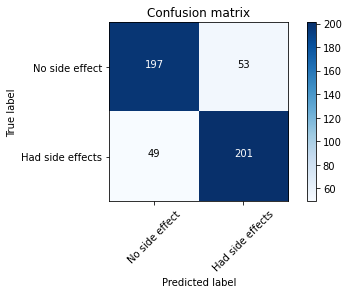

In [49]:
cm_plot_labels = ['No side effect', 'Had side effects']
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion matrix")

### Save and load model

In [71]:
model.save('./models/drug_model.h5')

from tensorflow.keras.models import load_model
saved_model = load_model('./models/drug_model.h5')


Save function saves:-    
    - Architecture of the model to recreate  
    - Weights of the model  
    - Training configuration (loss, optimizer)  
    - State of the optimizer, allowing to resume training exactly where you left off.  

In [58]:
saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [59]:
saved_model.optimizer

In [60]:
saved_model.get_weights()

[array([[-0.20934552, -0.5525667 , -0.38834667,  0.43361598, -0.3914523 ,
         -0.5027503 , -0.11883515,  0.6179223 , -0.38127792, -0.03657287,
         -0.5293077 , -0.46167406,  0.76150805,  0.33721387, -0.3091314 ,
          0.04942312]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.18095829,  0.        ,
         0.        ,  0.        , -0.19684532,  0.        ,  0.        ,
         0.        ,  0.        , -0.20781742, -0.1625564 ,  0.        ,
         0.22439764], dtype=float32),
 array([[-0.10916632, -0.32919022, -0.26661852, -0.26783344, -0.14511707,
          0.33552012, -0.11469008, -0.1626602 ,  0.06330466,  0.1727806 ,
          0.12569648,  0.16506419, -0.24499229, -0.280872  ,  0.00821096,
          0.0930132 , -0.25660402, -0.0580582 ,  0.33671638, -0.14708753,
         -0.19320267, -0.19030726, -0.3299261 , -0.29774404,  0.03798157,
          0.16926351, -0.10556951, -0.3333304 ,  0.02790502, -0.12019615,
          0.03423664, -0.09823638],
 

### Model to json

If we only want to save the architecture of the model but not the weights or training configuration.

In [61]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

### Model from json

In [62]:
from tensorflow.keras.models import model_from_json

In [64]:
saved_json_model = model_from_json(json_string)
saved_json_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Weights

- To save only weights

In [73]:
model.save_weights('./models/drug-weight.h5')

In [79]:
new_model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
new_model.load_weights('./models/drug-weight.h5')

### Note:-

- Set the activation of last dense layer to sigmoid, number of nodes to 1 and set loss to binary_crossentropy to achieve the same results 